<a href="https://colab.research.google.com/github/pscabral/Prezunic/blob/main/Teste_00001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/marcusklasson/GroceryStoreDataset

Cloning into 'GroceryStoreDataset'...
remote: Enumerating objects: 6559, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 6559 (delta 45), reused 35 (delta 35), pack-reused 6293
Receiving objects: 100% (6559/6559), 116.26 MiB | 32.41 MiB/s, done.
Resolving deltas: 100% (275/275), done.
Updating files: 100% (5717/5717), done.


In [ ]:
# Instalação do TensorFlow (descomente a linha abaixo se o TensorFlow não estiver instalado)
!pip install tensorflow

# Importação de recursos futuros do Python para compatibilidade
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Importação de bibliotecas
import collections
import math
import os
import random
from six.moves import urllib
import io
import shutil

# Importações para visualização no IPython
from IPython.display import clear_output, Image, display, HTML

# Importações para aprendizado de máquina com TensorFlow e Keras
import tensorflow as tf
import tensorflow_hub as hub

# Importações adicionais
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import time
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# Importações específicas para modelos de redes neurais
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
from keras.preprocessing import image
from keras import regularizers
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten
from keras import backend as K


In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Caminho para o diretório de treinamento das imagens
train_data_dir = /content/GroceryStoreDataset/dataset/train'

# Definir parâmetros para o pré-processamento das imagens
image_size = (224, 224)
batch_size = 32

# Crie um gerador de dados para treinamento com aumento de dados
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Usar 20% dos dados para validação

# Crie geradores de dados para treinamento e validação
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')  # Use a porção de treinamento

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  # Use a porção de validação

# Inicialize o LabelEncoder e ajuste-o aos rótulos de classe do seu conjunto de treinamento
label_encoder = LabelEncoder()
label_encoder.fit(train_generator.classes)

# Salvar as classes em um arquivo numpy
np.save('/content/label_encoder_classes.npy', label_encoder.classes_)

# Crie um modelo baseado na arquitetura InceptionV3 (você pode ajustar a arquitetura conforme necessário)
base_model = InceptionV3(weights='imagenet', include_top=False)

# Adicione camadas personalizadas para classificação
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)  # Usar o número de classes

# Crie o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compile o modelo com learning_rate em vez de lr
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Defina callbacks para parar o treinamento prematuramente se a validação não melhorar
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Treine o modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping])

# Caminho para o diretório de teste das imagens
test_data_dir = '/content/GroceryStoreDataset/dataset/test'

# Crie um gerador de dados para teste
test_datagen = ImageDataGenerator(rescale=1./255)

# Crie um gerador de dados de teste
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Avalie o modelo no conjunto de teste
eval_result = model.evaluate(test_generator)

# Exiba a precisão no conjunto de teste
print(f'Acurácia no conjunto de teste: {eval_result[1]*100:.2f}%')

# Salve o modelo treinado
model.save('classification_model.h5')

Found 920 images belonging to 19 classes.
Found 222 images belonging to 19 classes.
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/30
28/28 [==============================] - 498s 17s/step - loss: 1.5122 - accuracy: 0.5901 - val_loss: 3.3886 - val_accuracy: 0.4427
Epoch 2/30
28/28 [==============================] - 459s 16s/step - loss: 0.4013 - accuracy: 0.9043 - val_loss: 3.2402 - val_accuracy: 0.4792
Epoch 3/30
28/28 [==============================] - 476s 17s/step - loss: 0.1556 - accuracy: 0.9595 - val_loss: 2.0327 - val_accuracy: 0.6146
Epoch 4/30
28/28 [==============================] - 459s 16s/step - loss: 0.1081 - accuracy: 0.9673 - val_loss: 1.7874 - val_accuracy: 0.6250
Epoch 5/30
28/28 [==============================] - 463s 17s/step - loss: 0.0499 - accuracy: 0.9865 - val_loss: 0.9412 - val_accuracy: 0.7708
Epoch 6/30
28/28 [==============================] - 460s 16s/step - loss: 0.0424 - accuracy: 0.9876 - val_loss: 0.6550 - val_accuracy: 0.7865

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 2s 2s/step


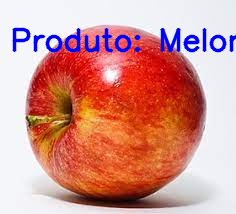

Melon


In [107]:
#pip install gTTS
import cv2
import numpy as np
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model
from gtts import gTTS
import IPython.display as ipd
from google.colab.patches import cv2_imshow
import os
import pandas as pd

# Carregar o modelo treinado
model = load_model('/content/classification_model.h5')
#teste carregando treimento de frutas
df_classes = pd.read_csv("/content/GroceryStoreDataset/dataset/classes.csv")
image_dic = dict(zip(df_classes['Coarse Class ID (int)'],df_classes['Coarse Class Name (str)'] ))

# Caminho para a imagem de teste (substitua pelo caminho da sua imagem)
caminho_imagem_teste = '/content/maça.jpg'

# Ler a imagem de teste
image = cv2.imread(caminho_imagem_teste)

# Redimensionar a imagem para o tamanho esperado pelo modelo
image_resized = cv2.resize(image, (224, 224))

# Pré-processamento específico do InceptionV3
image_preprocessed = preprocess_input(np.expand_dims(image_resized, axis=0))

# Fazer a previsão usando o modelo treinado
predicted_label = model.predict(image_preprocessed)

# Obter o ID da classe prevista
predicted_class_id = np.argmax(predicted_label)

# Obter o nome da classe a partir do caminho da imagem
predicted_class = image_dic[predicted_class_id]

# Exibir a imagem com a previsão
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image, f'Produto: {predicted_class}', (10, 50), font, 1, (255, 0, 0), 2, cv2.LINE_AA)
cv2_imshow(image)
print(predicted_class)

# Gerar o arquivo de áudio com o nome do produto previsto
tts = gTTS(text=f'O produto é {predicted_class}', lang='pt')
tts.save('/content/prevision.mp3')

# Reproduzir o arquivo de áudio
ipd.Audio('/content/prevision.mp3')

In [94]:
class_labels= np.load('/content/label_encoder_classes.npy')
class_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int32)